In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:

print("Mnist Veri seti işleniyor...")
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

Mnist Veri seti işleniyor...


In [3]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

print(f"Eğitim verilerinin boyutu ve sayısı={x_train.shape}")
print(f"Test verilerinin boyutu ve sayısı={x_test.shape}")

y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)
X_train,X_val,y_train,y_val=train_test_split(

    x_train,
    y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)
print(f"Veri bölme sonrası boyutlar:")
print(f"Eğitim verisi boyutu {X_train.shape} ")
print(f"Test verisi boyutu {y_test.shape} ")

Eğitim verilerinin boyutu ve sayısı=(60000, 28, 28, 1)
Test verilerinin boyutu ve sayısı=(10000, 28, 28, 1)
Veri bölme sonrası boyutlar:
Eğitim verisi boyutu (48000, 28, 28, 1) 
Test verisi boyutu (10000, 10) 


In [4]:
model=keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32,(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64,(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),


    keras.layers.Flatten(),
    keras.layers.Dense(512,activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation="softmax")
    
])

In [10]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [12]:
model_checkpoint=keras.callbacks.ModelCheckpoint(
    "two_blocks_cnn_for_mnist_dataset.h5",
    monitor="val_accuary",
    save_best_only=True,
    mode="max",verbose=1,
)

In [22]:
history=model.fit(X_train, y_train, validation_data=(X_val, y_val),
          batch_size=128, epochs=5, callbacks=model_checkpoint, verbose=1)

Epoch 1/5
375/375 [==============================] - 32s 85ms/step - loss: 0.0317 - accuracy: 0.9900 - val_loss: 0.0287 - val_accuracy: 0.9914
Epoch 2/5
375/375 [==============================] - 32s 84ms/step - loss: 0.0266 - accuracy: 0.9916 - val_loss: 0.0342 - val_accuracy: 0.9894
Epoch 3/5
375/375 [==============================] - 32s 85ms/step - loss: 0.0262 - accuracy: 0.9918 - val_loss: 0.0326 - val_accuracy: 0.9907
Epoch 4/5
375/375 [==============================] - 31s 84ms/step - loss: 0.0231 - accuracy: 0.9928 - val_loss: 0.0279 - val_accuracy: 0.9920
Epoch 5/5
375/375 [==============================] - 31s 83ms/step - loss: 0.0214 - accuracy: 0.9930 - val_loss: 0.0250 - val_accuracy: 0.9931


In [20]:
print("Test verisi üzerinde model değerlendirmesi başlıyor")
test_loss,test_accuary=model.evaluate(x_test,y_test)
print(f"Model hata oranı ={test_loss}")
print(f"Model doğruluk oranı {test_accuary}")

Test verisi üzerinde model değerlendirmesi başlıyor
313/313 [==============================] - 2s 8ms/step - loss: 0.0225 - accuracy: 0.9925
Model hata oranı =0.022482236847281456
Model doğruluk oranı 0.9925000071525574


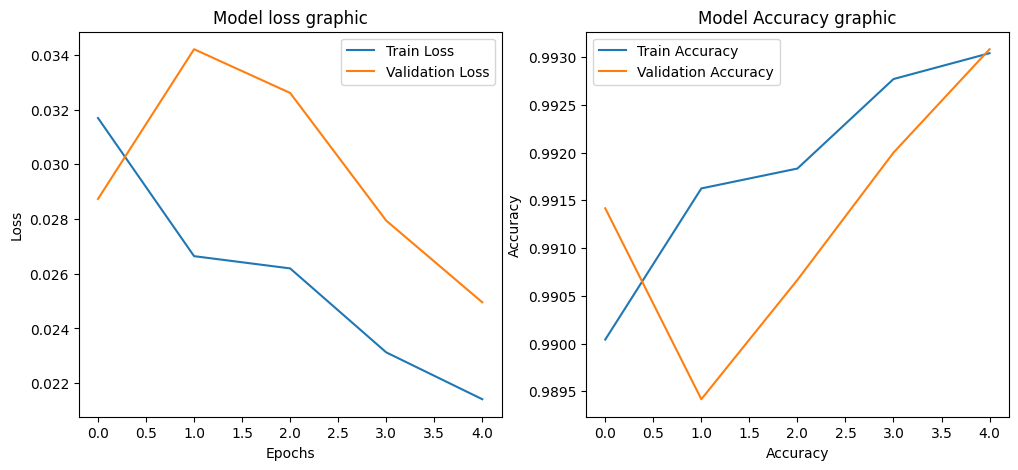

In [30]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history["loss"],label="Train Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.title("Model loss graphic")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"],label="Train Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.title("Model Accuracy graphic")
plt.xlabel("Accuracy")
plt.ylabel("Accuracy")
plt.legend()

In [32]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
y_pred=model.predict(x_test)
y_pred_class=np.argmax(y_pred,axis=1)
y_test_class=np.argmax(y_test,axis=1)

313/313 [==============================] - 3s 8ms/step


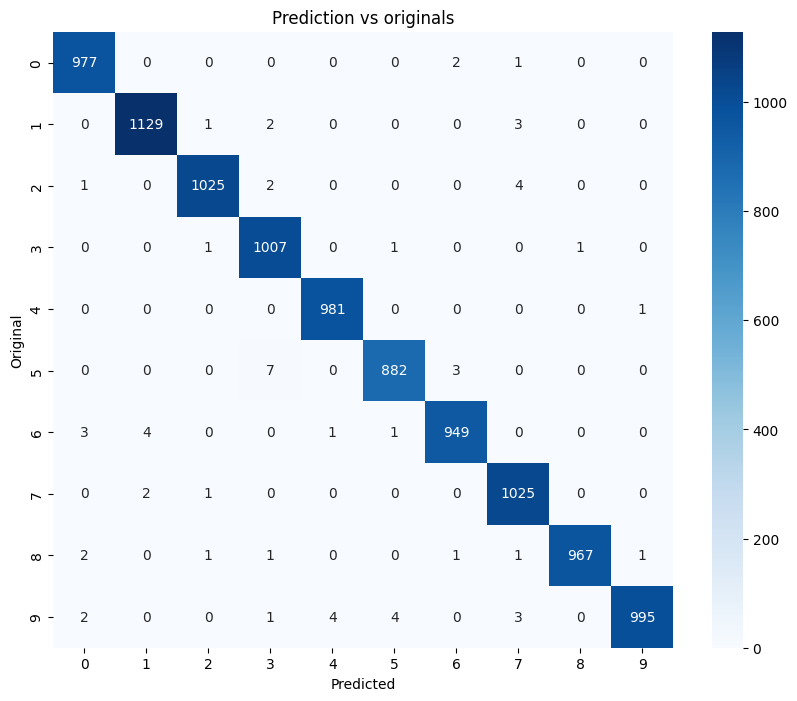

In [36]:
cm=confusion_matrix(y_test_class,y_pred_class)
plt.figure(figsize=(10,8))
sns.heatmap(cm,fmt="d",annot=True,cmap="Blues")
plt.title("Prediction vs originals")
plt.xlabel("Predicted")
plt.ylabel("Original")
plt.show()